In [1]:
import mysql.connector as my

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mydb = my.connect(host="localhost",user="root",password="kunaljds",database="project")


cursor = mydb.cursor()


cursor.execute('SELECT * FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])


cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])


Text(0.5, 1.0, 'City wise customer')

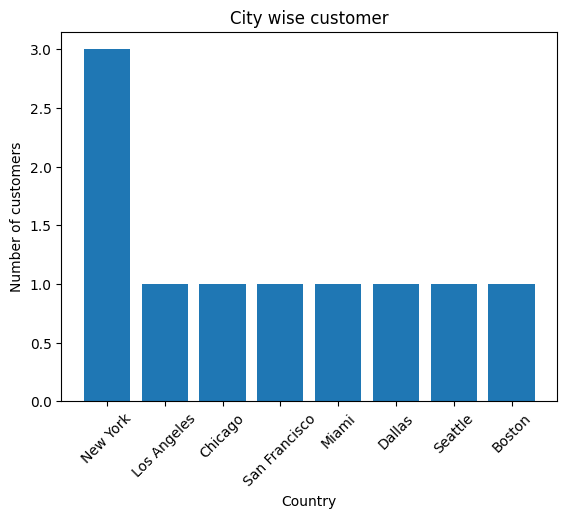

In [97]:
customer_data
citywise=customer_data['city'].value_counts().reset_index()
plt.bar(citywise['city'],citywise['count'])
plt.xlabel("Country")
plt.ylabel("Number of customers")
plt.xticks(rotation=45)
plt.title("City wise customer")


Text(0.5, 1.0, 'Most frequent customer')

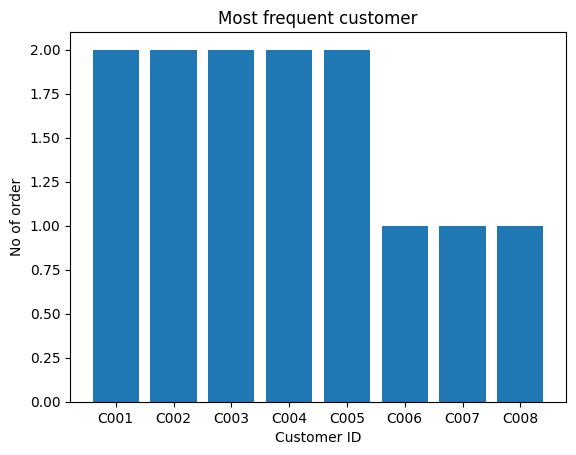

In [117]:
customer_order_frequency=order_data['customer_id'].value_counts().reset_index()
customer_order_frequency.columns = ['Customer_ID', 'Order_Count']

most_frequent_customers = customer_order_frequency.sort_values(by='Order_Count', ascending=False)

plt.bar(most_frequent_customers['Customer_ID'],most_frequent_customers['Order_Count'])
plt.xlabel("Customer ID")
plt.ylabel("No of order")
plt.title("Most frequent customer")

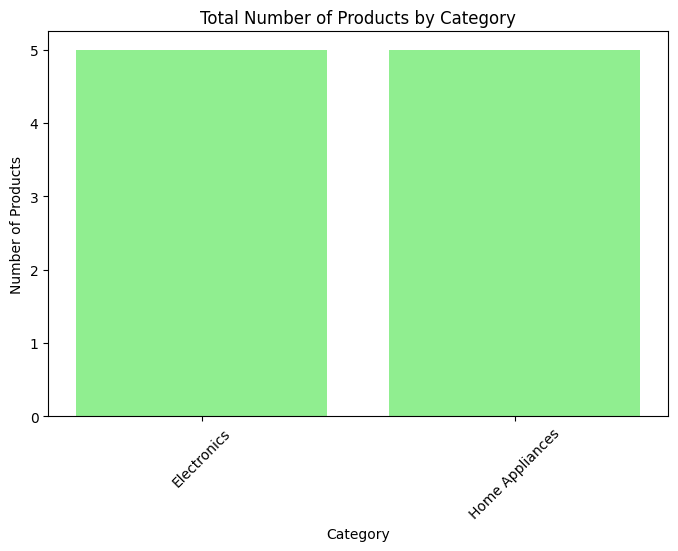

In [118]:
# category_distribution = product_data.groupby('category')['product_id'].count().reset_index
category_distribution=product_data['category'].value_counts().reset_index()


category_distribution.columns = ['Category', 'Product_Count']
plt.figure(figsize=(8, 5))
plt.bar(category_distribution['Category'], category_distribution['Product_Count'], color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Total Number of Products by Category')
plt.xticks(rotation=45)
plt.show()


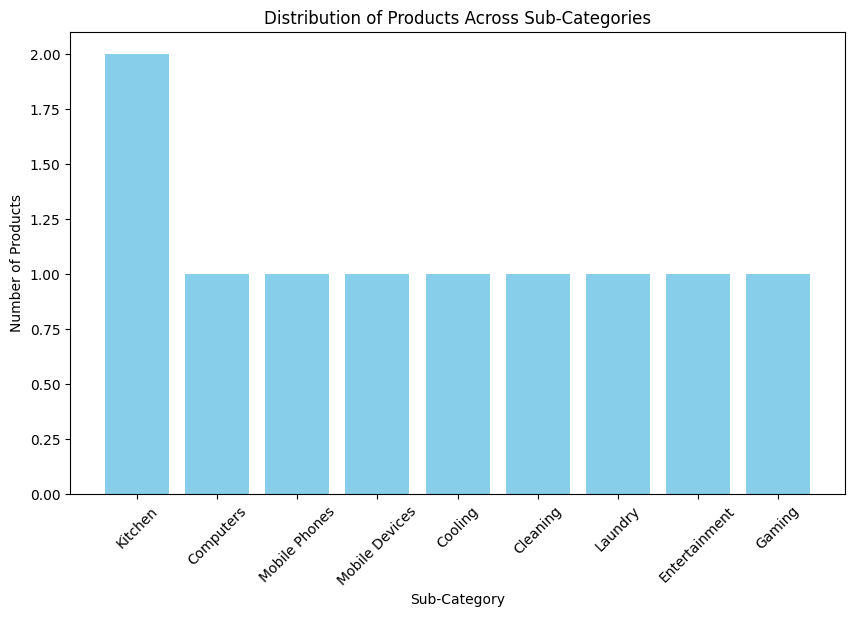

In [119]:

sub_category_distribution=product_data['sub_category'].value_counts().reset_index()
# print(sub_category_distribution)
sub_category_distribution.columns = ['Sub_Category', 'Product_Count']
plt.figure(figsize=(10, 6))
plt.bar(sub_category_distribution['Sub_Category'], sub_category_distribution['Product_Count'], color='skyblue')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.title('Distribution of Products Across Sub-Categories')
plt.xticks(rotation=45)
plt.show()

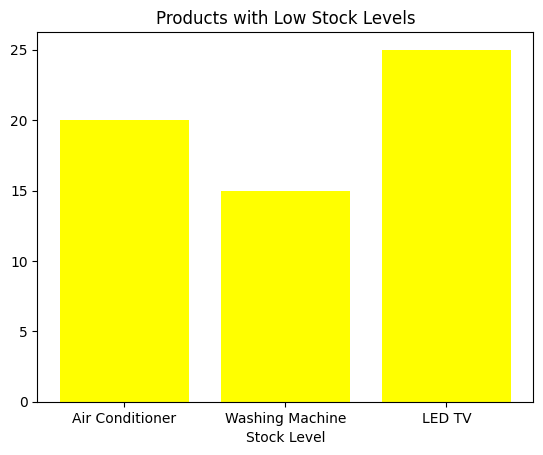

In [122]:
low_stock_product=product_data[product_data['stock'] < 30]
plt.bar(low_stock_product['product_name'],low_stock_product['stock'],color="Yellow")
plt.xlabel("Product Id")
plt.xlabel("Stock Level")
plt.title("Products with Low Stock Levels")
plt.show()

Text(0.5, 1.0, 'Average, Maximum, and Minimum Selling Prices')

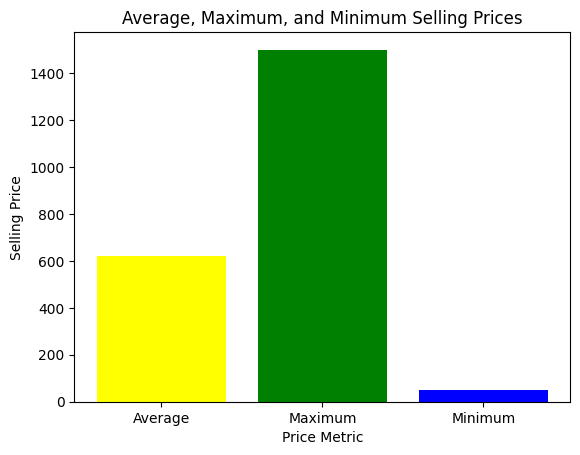

In [14]:
average_selling_price = product_data['selling_price'].mean()
maximum_selling_price = product_data['selling_price'].max()
minimum_selling_price = product_data['selling_price'].min()

price_data = {
    'Metric': ['Average', 'Maximum', 'Minimum'],
    'Price': [average_selling_price, maximum_selling_price, minimum_selling_price]
}

price_df = pd.DataFrame(price_data)


plt.bar(price_df['Metric'], price_df['Price'], color=['Yellow', 'green', 'blue'])
plt.xlabel('Price Metric')
plt.ylabel('Selling Price')
plt.title('Average, Maximum, and Minimum Selling Prices')

<BarContainer object of 10 artists>

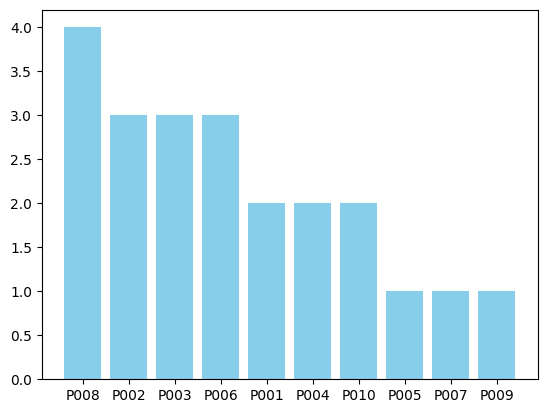

In [15]:
top10=order_data.groupby('product_id')['quantity'].sum().nlargest(10).reset_index()

plt.bar(top10['product_id'],top10['quantity'], color=['skyblue'])
plt.xlabel('Product Id')
plt.ylabel('Number of orders')
plt.title('Total number of orders product wise')

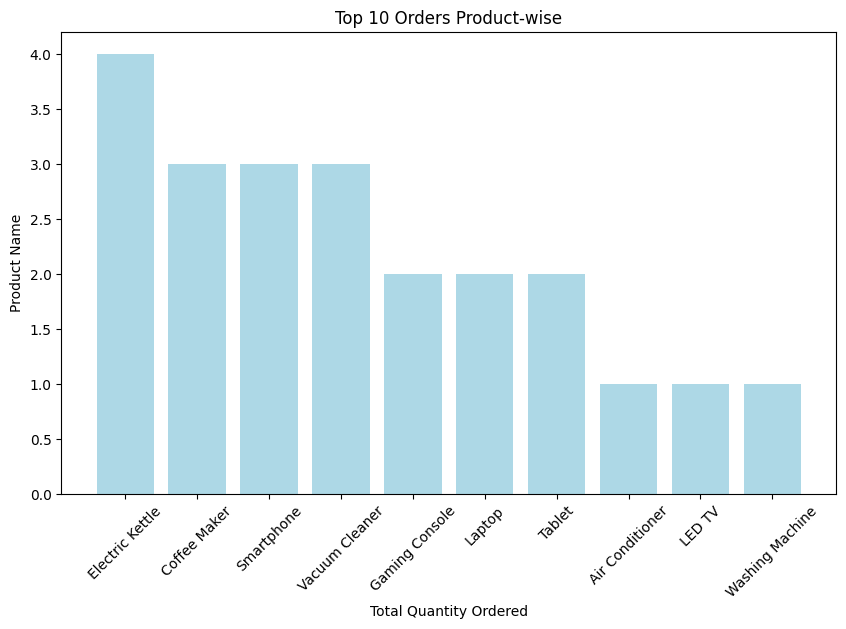

In [16]:
merged_data = pd.merge(order_data, product_data, on='product_id')
top_orders = merged_data.groupby('product_name')['quantity'].sum().reset_index()
top_10_orders = top_orders.sort_values(by='quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_orders['product_name'], top_10_orders['quantity'], color='lightblue')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.title('Top 10 Orders Product-wise')
plt.xticks(rotation=45)
plt.show()

<BarContainer object of 3 artists>

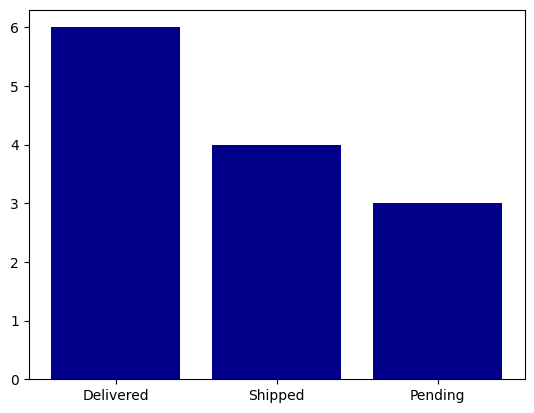

In [18]:
status=order_data['order_status'].value_counts().reset_index()
status.columns=['order_status','Status_count']
plt.bar(status['order_status'],status['Status_count'],color='darkblue')
plt.xlabel('Order status')
plt.ylabel('Number of Orders')
plt.title('Order Status Distribution')

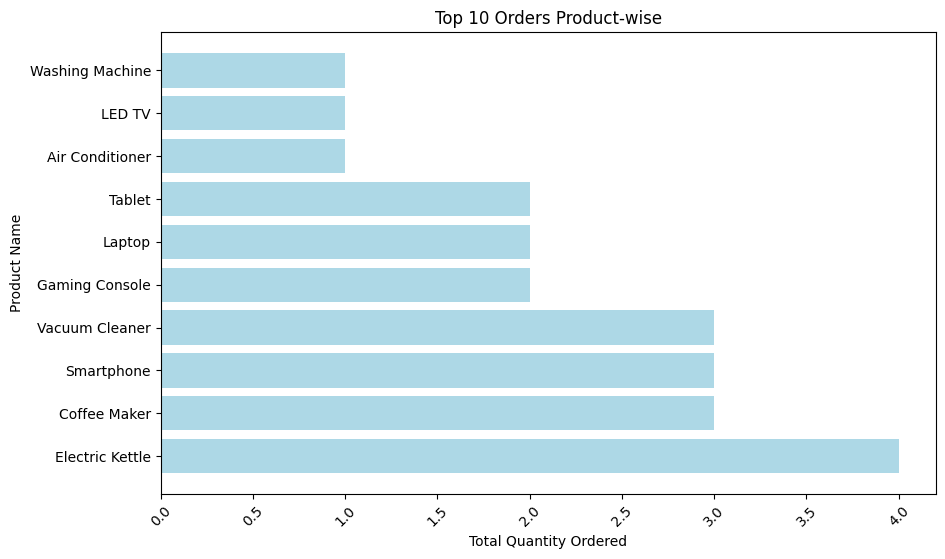

In [19]:
merged_data = pd.merge(order_data, product_data, on='product_id')
top_orders = merged_data.groupby('product_name')['quantity'].sum().reset_index()
top_10_orders = top_orders.sort_values(by='quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_orders['product_name'], top_10_orders['quantity'], color='lightblue')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.title('Top 10 Orders Product-wise')
plt.xticks(rotation=45)
plt.show()

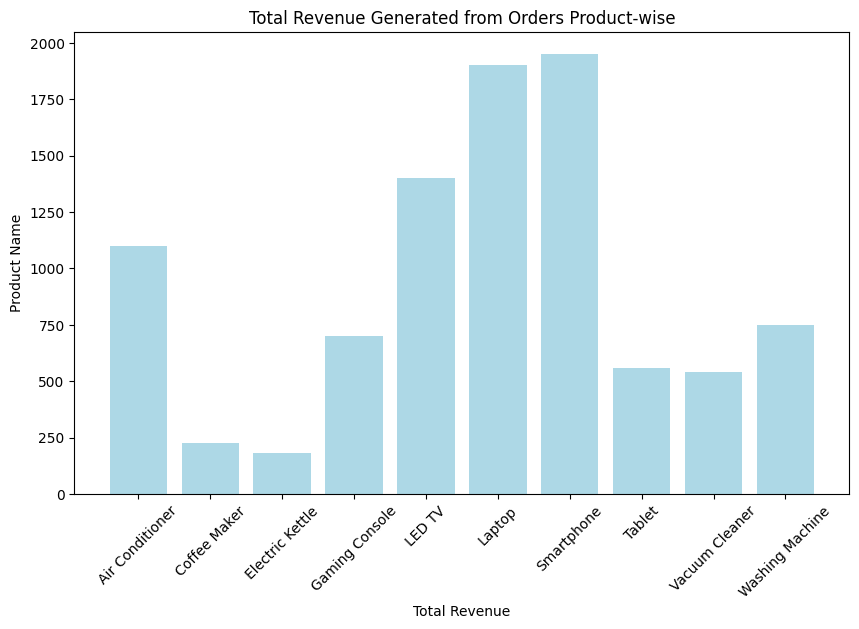

In [20]:
revenue_data = merged_data.groupby('product_name')['total_price'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(revenue_data['product_name'], revenue_data['total_price'], color='lightblue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.title('Total Revenue Generated from Orders Product-wise')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Total Revenye Precentage for Each Category')

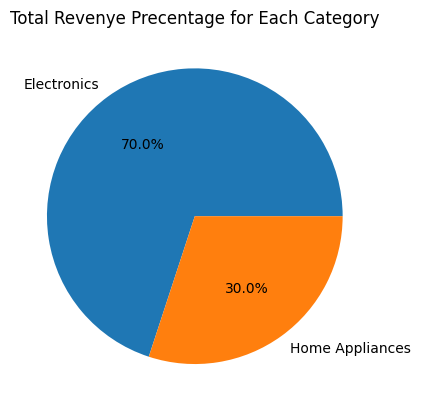

In [123]:
category_revenue_by_category = merged_data.groupby('category')['total_price'].sum().reset_index()

total_revenue = category_revenue_by_category['total_price'].sum()
plt.pie(category_revenue_by_category['total_price'],labels=category_revenue_by_category['category'],autopct='%1.1f%%')
plt.title("Total Revenye Precentage for Each Category")

In [22]:
total_revenue=order_data['total_price'].sum()
total_revenue

np.float64(9305.0)

Text(0.5, 1.0, 'Total Revenue')

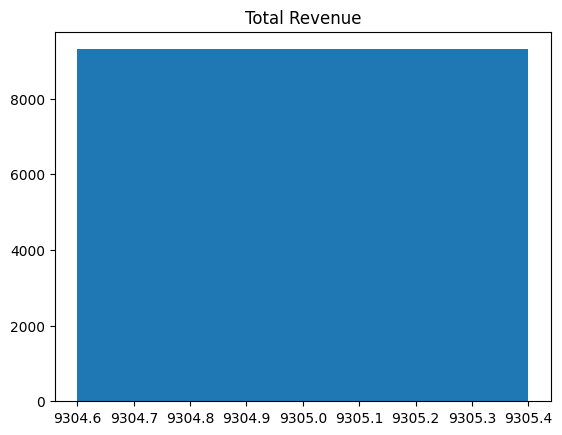

In [124]:
plt.bar(total_revenue,total_revenue)

plt.title('Total Revenue')

In [51]:
merged_data

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,selling_price,original_price,stock
0,1,C001,P001,1.0,950.0,Credit Card,2024-08-01 10:00:00,Shipped,Laptop,Electronics,Computers,1000,950,50
1,2,C002,P002,2.0,1300.0,PayPal,2024-08-02 15:30:00,Delivered,Smartphone,Electronics,Mobile Phones,700,650,100
2,3,C003,P003,1.0,75.0,Credit Card,2024-08-03 12:45:00,Pending,Coffee Maker,Home Appliances,Kitchen,80,75,30
3,4,C004,P004,2.0,560.0,Debit Card,2024-08-05 11:00:00,Delivered,Tablet,Electronics,Mobile Devices,300,280,150
4,5,C005,P005,1.0,1100.0,Credit Card,2024-08-06 14:30:00,Shipped,Air Conditioner,Home Appliances,Cooling,1200,1100,20
5,6,C006,P006,3.0,540.0,PayPal,2024-08-07 09:45:00,Pending,Vacuum Cleaner,Home Appliances,Cleaning,200,180,60
6,7,C007,P007,1.0,750.0,Credit Card,2024-08-08 16:20:00,Delivered,Washing Machine,Home Appliances,Laundry,800,750,15
7,8,C008,P008,4.0,180.0,Debit Card,2024-08-09 18:15:00,Delivered,Electric Kettle,Home Appliances,Kitchen,50,45,100
8,9,C001,P009,1.0,1400.0,Credit Card,2024-08-10 20:00:00,Shipped,LED TV,Electronics,Entertainment,1500,1400,25
9,10,C002,P010,2.0,700.0,PayPal,2024-08-11 21:30:00,Pending,Gaming Console,Electronics,Gaming,400,350,80


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Coffee Maker'),
  Text(1, 0, 'Electric Kettle'),
  Text(2, 0, 'Tablet'),
  Text(3, 0, 'Vacuum Cleaner'),
  Text(4, 0, 'Laptop'),
  Text(5, 0, 'Smartphone'),
  Text(6, 0, 'Washing Machine'),
  Text(7, 0, 'Gaming Console'),
  Text(8, 0, 'Air Conditioner'),
  Text(9, 0, 'LED TV')])

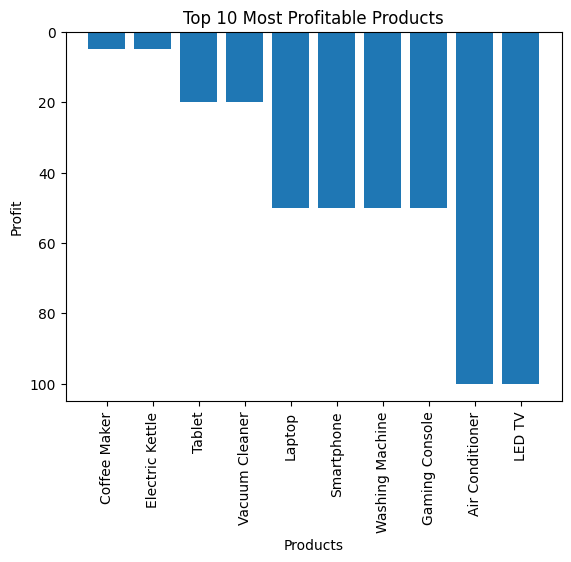

In [48]:
profitable_prices=product_data['selling_price']-product_data['original_price']
profitable_products = pd.DataFrame({
    'Product Name': product_data['product_name'],
    'Profit': profitable_prices
})
profitable_products.sort_values(by="Profit",inplace=True)
plt.bar(profitable_products['Product Name'],profitable_products['Profit'])
plt.xlabel('Products')
plt.ylabel('Profit')
plt.title('Top 10 Most Profitable Products')
plt.gca().invert_yaxis()
plt.xticks(rotation=90)

In [49]:
# Customer Order Patterns

Text(0.5, 1.0, 'Total quantity of highest and lowest orderd products')

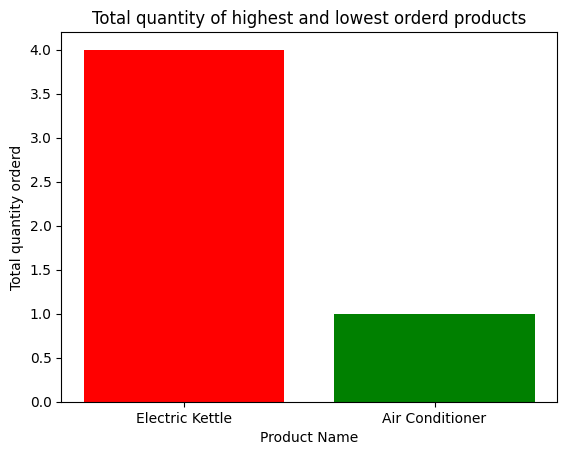

In [125]:
product_order_totals = merged_data.groupby('product_name')['quantity'].sum()

highest_order_product = product_order_totals.idxmax()
highest_order_quantity = product_order_totals.max()

lowest_order_product = product_order_totals.idxmin()
lowest_order_quantity = product_order_totals.min()

max_min_q={
    "Product":[highest_order_product,lowest_order_product],
    "Quntity":[highest_order_quantity,lowest_order_quantity]
}

plt.bar(max_min_q["Product"],max_min_q["Quntity"],color=["red","green"])
plt.xlabel('Product Name')
plt.ylabel('Total quantity orderd')
plt.title('Total quantity of highest and lowest orderd products')

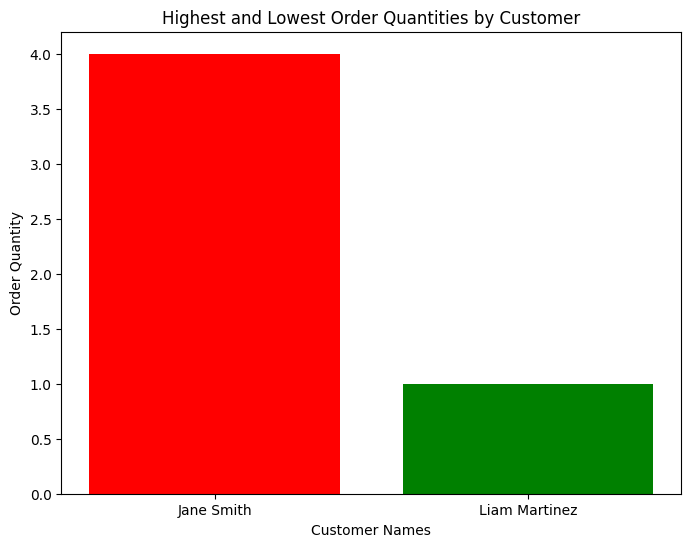

In [77]:

customer_order_totals = merged_data.groupby('customer_id')['quantity'].sum()

highest_order_customer = customer_order_totals.idxmax()
highest_order_quantity = customer_order_totals.max()

lowest_order_customer = customer_order_totals.idxmin()
lowest_order_quantity = customer_order_totals.min()

max_min_q = {
    "customer_id": [highest_order_customer, lowest_order_customer],
    "Quantity": [highest_order_quantity, lowest_order_quantity]
}

names = []
for customer_id in max_min_q["customer_id"]:
    name = customer_data[customer_data['customer_id'] == customer_id].iloc[0]['name']
    names.append(name)

plt.figure(figsize=(8, 6))
plt.bar(names, max_min_q["Quantity"], color=["red", "green"])
plt.xlabel('Customer Names')
plt.ylabel('Order Quantity')
plt.title('Highest and Lowest Order Quantities by Customer')
plt.show()


In [79]:
payment_methods= order_data['payment_mode'].value_counts().reset_index()
payment_methods

,payment_mode,count
0,Credit Card,8
1,PayPal,3
2,Debit Card,2


Text(0.5, 1.0, 'Payment Mode Preferences')

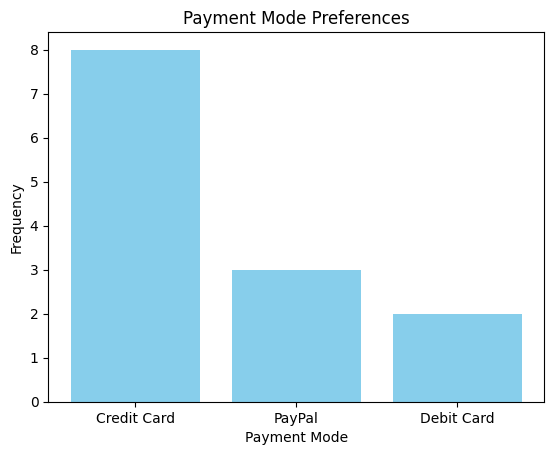

In [126]:
plt.bar(payment_methods['payment_mode'],payment_methods['count'],color="Skyblue")
plt.xlabel('Payment Mode')
plt.ylabel('Frequency')
plt.title('Payment Mode Preferences')

In [127]:
# Time-based Analysis

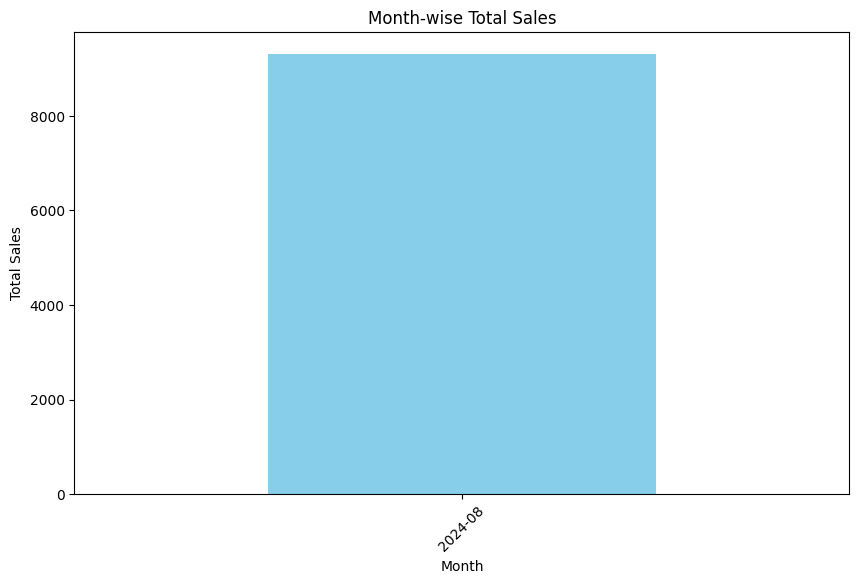

In [88]:
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

order_data['month'] = order_data['order_date'].dt.to_period('M')

month_wise_sales = order_data.groupby('month')['total_price'].sum()




plt.figure(figsize=(10, 6))
month_wise_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=45)
plt.show()


year_month
2024-08    9305.0
Freq: M, Name: total_price, dtype: float64


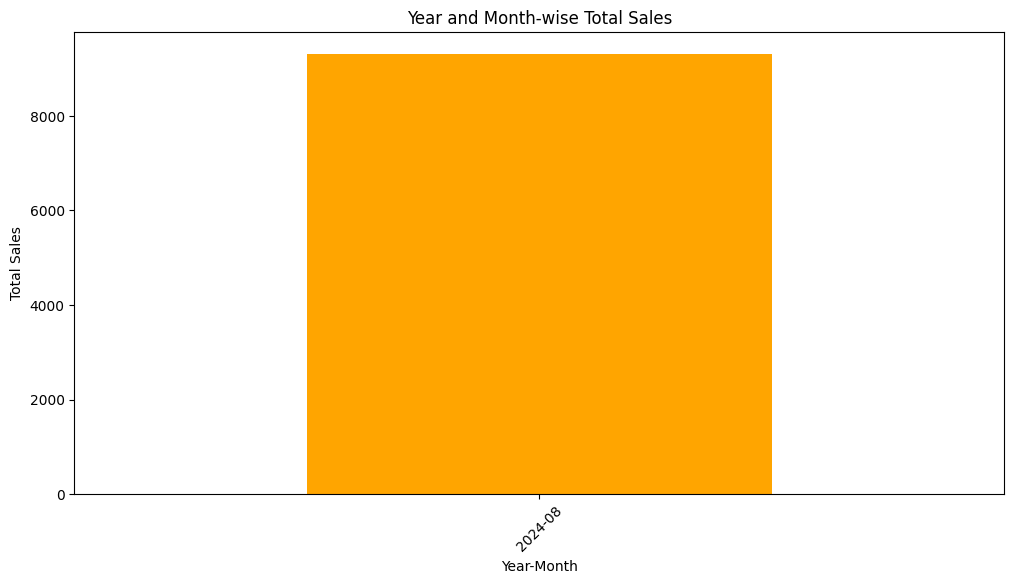

In [89]:
order_data['year_month'] = order_data['order_date'].dt.to_period('M')

year_month_wise_sales = order_data.groupby('year_month')['total_price'].sum()

print(year_month_wise_sales)


plt.figure(figsize=(12, 6))
year_month_wise_sales.plot(kind='bar', color='orange')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Year and Month-wise Total Sales')
plt.xticks(rotation=45)
plt.show()

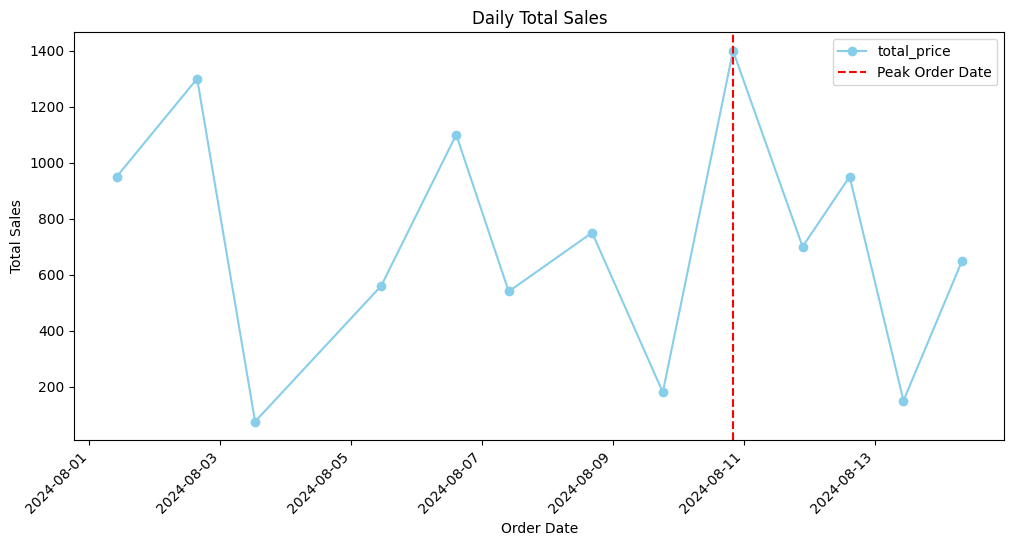

In [94]:
daily_sales = order_data.groupby('order_date')['total_price'].sum()

peak_order_date = daily_sales.idxmax()
peak_sales_amount = daily_sales.max()

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', color='skyblue',marker='o')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Daily Total Sales')
plt.axvline(x=peak_order_date, color='red', linestyle='--', label='Peak Order Date')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Customer distribution across different cities')

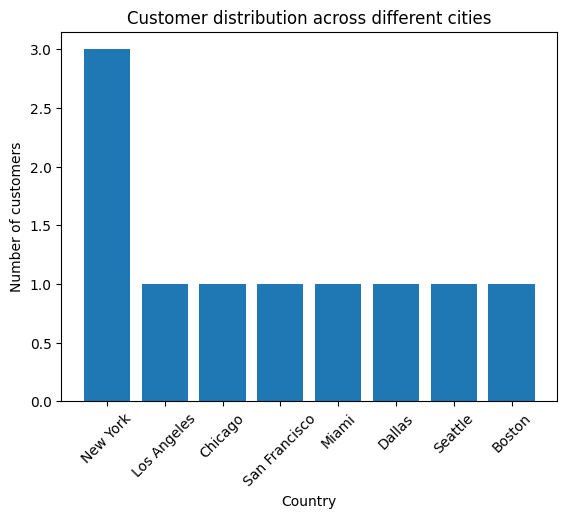

In [99]:
# ● Geographical Analysis
citywise=customer_data['city'].value_counts().reset_index()
plt.bar(citywise['city'],citywise['count'])
plt.xlabel("Country")
plt.ylabel("Number of customers")
plt.xticks(rotation=45)
plt.title("Customer distribution across different cities")


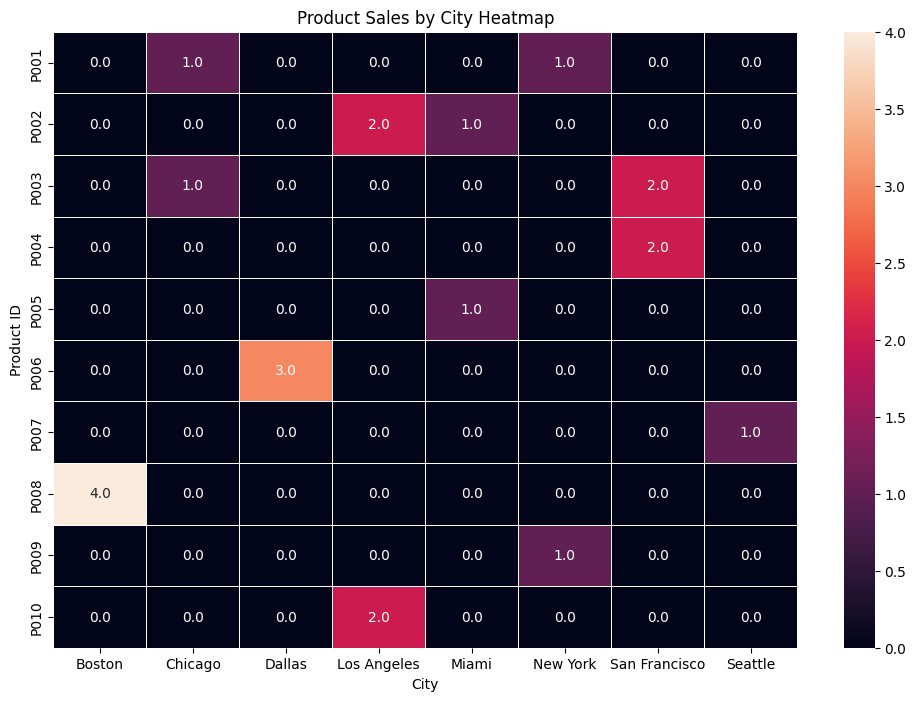

In [115]:
import seaborn as sns

order_details_with_info = order_data.merge(customer_data[['customer_id', 'city']], on='customer_id')
order_details_with_info = order_details_with_info.merge(product_data[['product_id', 'category']], on='product_id')

city_product_sales = order_details_with_info.groupby(['city', 'product_id', 'category'])['quantity'].sum().reset_index()

pivot_data = city_product_sales.pivot_table(index='product_id', columns='city', values='quantity', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='.1f', linewidths=.5)
plt.title('Product Sales by City Heatmap')
plt.xlabel('City')
plt.ylabel('Product ID')
plt.show()


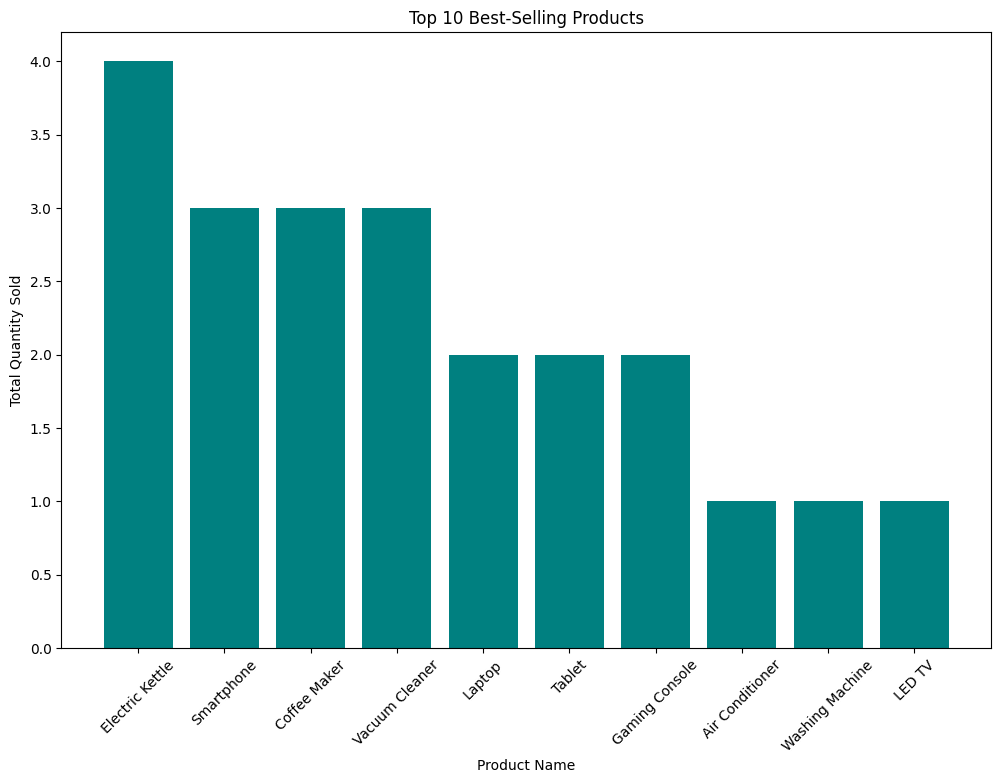

In [104]:
product_sales = order_data.groupby('product_id')['quantity'].sum()

product_sales = product_sales.reset_index()
product_sales = product_sales.merge(product_data, on='product_id')
best_selling_products = product_sales.sort_values(by='quantity', ascending=False)


top_products = best_selling_products.head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_products['product_name'], top_products['quantity'], color='teal')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.show()

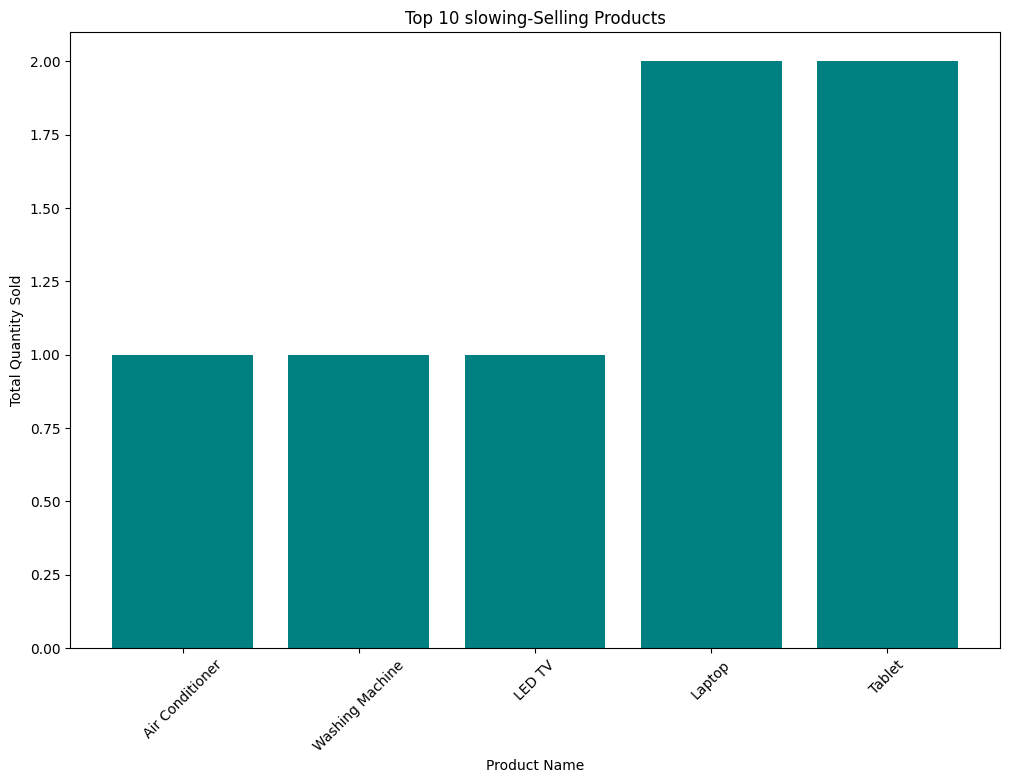

In [108]:
slow_moving_products = product_sales.sort_values(by='quantity')


bottom_products = slow_moving_products.head(5)

plt.figure(figsize=(12, 8))
plt.bar(bottom_products['product_name'], bottom_products['quantity'], color='teal')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 slowing-Selling Products')
plt.xticks(rotation=45)
plt.show()

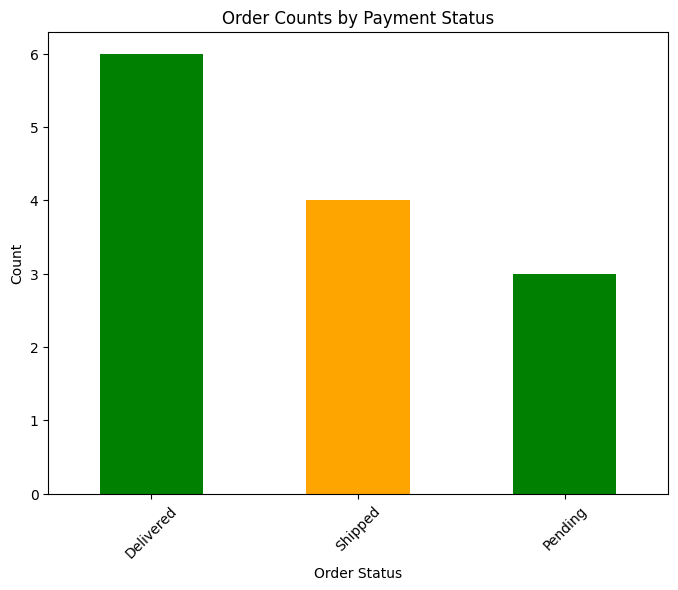

In [107]:
payment_status_counts = order_data['order_status'].value_counts()


plt.figure(figsize=(8, 6))
payment_status_counts.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Order Counts by Payment Status')
plt.xticks(rotation=45)
plt.show()

In [112]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.
